In [1]:
import pandas as pd
from PIL import Image

In [21]:
data1 = pd.read_csv("../flickr8k/train.csv")
data2 = pd.read_csv("../flickr8k/test.csv")
data3 = pd.read_csv("../flickr8k/val.csv")

In [34]:
data = pd.concat([data1,data2,data3],ignore_index=True)
data.head()

,Unnamed: 0,image,caption,khmer
0,37753,506412121_67ecc7ec05.jpg,Man fishes in ocean .,បុរស នេសាទ ត្រី នៅក្នុង មហាសមុទ្រ ។
1,23419,3245266444_2e798096e6.jpg,Two kids underneath a sheet playing with a whi...,ក្មេង ពីរ នាក់ នៅក្រោម សន្លឹក បៀរ លេង ជាមួយ ឆ្...
2,14785,279550225_d64d56158a.jpg,A man shows off his tongue ring while posing w...,បុរស ម្នាក់ បង្អួត អណ្ដាត ខណៈ កំពុង ថត រូប ជ...
3,7097,2280525192_81911f2b00.jpg,A dog wearing a red harness runs across a field,ឆ្កែ ពាក់ ខ្សែក្រហម រត់ កាត់ វាល ស្រែ
4,23234,3238654429_d899e34287.jpg,Snowboarder in midair performing a stunt on mo...,អ្នក ជិះ ស្គី លើ អាកាស សម្តែង ក្បាច់ រាំ នៅល...


In [5]:
image_dir = "../flickr8k/images/"

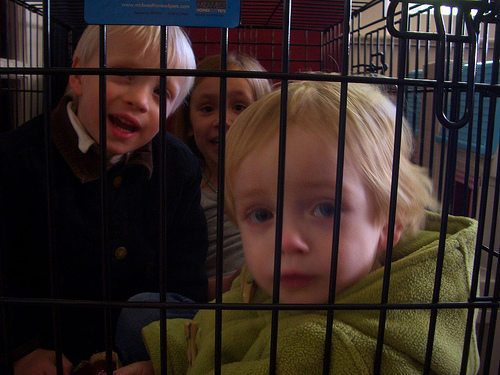

ក្មេង តូច ៗ បី នាក់ នៅក្នុង ទ្រុង មួយ ។


In [45]:
img = Image.open(image_dir+data['image'][6])
img.show()
print(data['khmer'][6])

In [35]:
data.groupby('image').image.count()

image
1000268201_693b08cb0e.jpg    5
1001773457_577c3a7d70.jpg    5
1002674143_1b742ab4b8.jpg    5
1003163366_44323f5815.jpg    5
1007129816_e794419615.jpg    5
                            ..
990890291_afc72be141.jpg     5
99171998_7cc800ceef.jpg      5
99679241_adc853a5c0.jpg      5
997338199_7343367d7f.jpg     5
997722733_0cb5439472.jpg     5
Name: image, Length: 8091, dtype: int64

In [40]:
filter = data[data['image']=='1000268201_693b08cb0e.jpg']
filter

,Unnamed: 0,image,caption,khmer
1252,3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,ក្មេងស្រី តូច ម្នាក់ ឡើង ជណ្តើរ ទៅ ផ្ទះ លេង រប...
7587,2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,ក្មេងស្រី តូច ម្នាក់ ឡើង ចូល ទៅក្នុង ផ្ទះ លេង ...
18303,0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,កុមារ ម្នាក់ ក្នុង ឈុត ពណ៌ ផ្កាឈូក កំពុង ឡើង ជ...
28744,4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,ក្មេងស្រី តូច ម្នាក់ ក្នុង សម្លៀកបំពាក់ ពណ៌ ផ្...
29823,1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,ក្មេងស្រី ម្នាក់ ចូល ទៅក្នុង អាគារ ឈើ ។


In [44]:
for i in filter.khmer:
    print(i)

ក្មេងស្រី តូច ម្នាក់ ឡើង ជណ្តើរ ទៅ ផ្ទះ លេង របស់ នាង ។
ក្មេងស្រី តូច ម្នាក់ ឡើង ចូល ទៅក្នុង ផ្ទះ លេង ឈើ ។
កុមារ ម្នាក់ ក្នុង ឈុត ពណ៌ ផ្កាឈូក កំពុង ឡើង ជណ្តើរ ក្នុង ផ្លូវ ចូល ។
ក្មេងស្រី តូច ម្នាក់ ក្នុង សម្លៀកបំពាក់ ពណ៌ ផ្កាឈូក ចូល ទៅក្នុង កាប៊ីន ឈើ ។
ក្មេងស្រី ម្នាក់ ចូល ទៅក្នុង អាគារ ឈើ ។


In [4]:
import requests
from PIL import Image
import datasets
from transformers import VisionEncoderDecoderModel, AutoImageProcessor,AutoTokenizer
import pandas as pd
import os


In [2]:
trained_model = '/home/ponleur.veng/image-caption/output_training/vit-base-patch16-224-in21k-xlm-roberta-base'
model = VisionEncoderDecoderModel.from_pretrained(trained_model)
# print(model)
tokenizer = AutoTokenizer.from_pretrained(trained_model)
image_processor = AutoImageProcessor.from_pretrained(trained_model)


test_df = pd.read_csv('../flickr8k/test.csv')



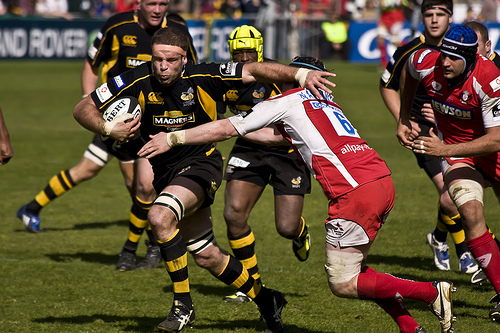

Original Text in Khmer អ្នកលេង បាល់ឱប ព្យាយាម ដោះលែង កីឡាករ ប្រឆាំង ដោយ ក្រុម ទាំង ពីរ ចូលរួម ។
Original Text in English A rugby player attempts to break free of an opposing player with both teams closing in .
Generated Text ['អ្នក   ប  ពណ៌   ។  ']


In [3]:
max_length = 128
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

image = Image.open(os.path.join('/home/ponleur.veng/image-caption/flickr8k/images',test_df['image'][10])).convert('RGB')
image.show()
pixel_values = image_processor(image, return_tensors="pt").pixel_values

# autoregressively generate caption (uses greedy decoding by default)
generated_ids = model.generate(pixel_values,**gen_kwargs)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
print(f"Original Text in Khmer {test_df['khmer'][10]}")
print(f"Original Text in English {test_df['caption'][10]}")
print(f'Generated Text {generated_text}')

In [5]:
test_tokenizer = AutoTokenizer.from_pretrained('SeaLLMs/SeaLLM-7B-v2.5')

In [9]:
# Tokenize the text
khmer_text = 'របាយការណ៍ '
tokens = test_tokenizer.tokenize(khmer_text)

# Convert tokens to input IDs
input_ids = test_tokenizer.convert_tokens_to_ids(tokens)

In [10]:
print("Tokens:", tokens)
print("Input IDs:", input_ids)

Tokens: ['រ', 'ប', 'ា', 'យ', 'ក', 'ា', 'រ', 'ណ', '៍', '▁']
Input IDs: [240175, 241020, 239773, 242181, 240620, 239773, 240175, 243952, 247740, 235248]
